In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data['Gender'] = data['Sex'].map({'male':0, 'female':1})

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
import re

In [9]:
data['Title'] = data['Name'].map(lambda name: re.search('[a-zA-Z]+\.',name).group(0))

In [10]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Don.           1
Countess.      1
Mme.           1
Jonkheer.      1
Ms.            1
Sir.           1
Capt.          1
Lady.          1
Name: Title, dtype: int64

In [11]:
def classify_title(title):
    if title in ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Rev.', 'Dr.']:
        return title
    elif title == 'Mme.':
        return 'Mrs.'
    elif title == 'Mlle.':
        return 'Miss.'
    else:
        return 'Rare'

In [12]:
data['Title'] = data['Title'].map(classify_title)

In [13]:
data['Title'].value_counts()

Mr.        517
Miss.      184
Mrs.       126
Master.     40
Rare        11
Dr.          7
Rev.         6
Name: Title, dtype: int64

In [14]:
title_df = pd.get_dummies(data['Title'])

In [15]:
title_df.head()

,Dr.,Master.,Miss.,Mr.,Mrs.,Rare,Rev.
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
data = pd.concat([data,title_df],axis=1)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Gender,Title,Dr.,Master.,Miss.,Mr.,Mrs.,Rare,Rev.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,Mr.,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,Mrs.,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,Miss.,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,Mrs.,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,Mr.,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Gender         891 non-null int64
Title          891 non-null object
Dr.            891 non-null float64
Master.        891 non-null float64
Miss.          891 non-null float64
Mr.            891 non-null float64
Mrs.           891 non-null float64
Rare           891 non-null float64
Rev.           891 non-null float64
dtypes: float64(9), int64(6), object(6)
memory usage: 146.3+ KB


In [19]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Gender,Title,Dr.,Master.,Miss.,Mr.,Mrs.,Rare,Rev.
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,0,Mr.,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,...,S,0,Mr.,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,...,C,1,Mrs.,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,...,C,0,Mr.,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,...,Q,1,Miss.,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,...,S,0,Mr.,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,...,C,1,Mrs.,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,...,Q,1,Miss.,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,...,C,0,Mr.,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,...,C,0,Mr.,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
median_age = data.groupby('Title')['Age'].median()

In [21]:
median_age

Title
Dr.        46.5
Master.     3.5
Miss.      21.0
Mr.        30.0
Mrs.       35.0
Rare       48.0
Rev.       46.5
Name: Age, dtype: float64

In [22]:
missing_ages = data[data['Age'].isnull()]['Title'].map(median_age)

In [23]:
data['Age'].fillna(missing_ages,inplace=True)

In [24]:
X=data.loc[:,['Pclass','Age','Fare','Gender','Parch','SibSp','Dr.','Mr.','Mrs.','Miss.','Rev.','Master.','Rare']]

In [25]:
y = data['Survived']

In [26]:
X.head()

,Pclass,Age,Fare,Gender,Parch,SibSp,Dr.,Mr.,Mrs.,Miss.,Rev.,Master.,Rare
0,3,22.0,7.2500,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,38.0,71.2833,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,26.0,7.9250,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,35.0,53.1000,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,35.0,8.0500,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Using Random Forest Classifier:

Random Forest Classifier "fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting" - source: [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Random forests 
- constructs a bunch of decision trees and outputs the class that is the mode of classes or mean prediction of individual trees 
- avoid overfitting as seen in Decision Tree Classification

Decision tree
- looks at features and sees how well it splits the data
- finds nicest split - creates node - then continues process 


In [27]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [28]:
clf = RFC(n_estimators=100)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Fit and score the model:

In [31]:
clf = RFC(n_estimators=100)

In [32]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
clf.score(X_test,y_test)

0.84357541899441346

In [34]:
feature_importance = pd.Series(clf.feature_importances_,index=X.columns)

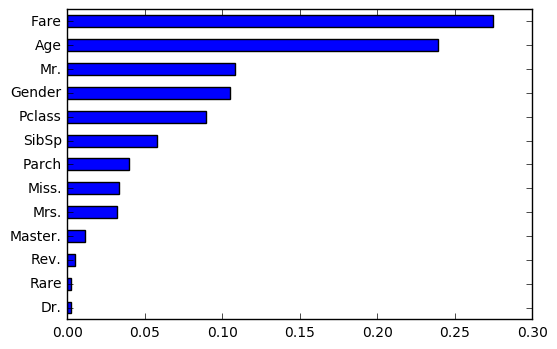

In [35]:
feature_importance.sort_values().plot(kind='barh')

## What if we just make the simple assumption that all males die and all females survive?

In [85]:
df = pd.read_csv('test.csv')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Name            418 non-null object
Sex             418 non-null object
Age             332 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Ticket          418 non-null object
Fare            417 non-null float64
Cabin           91 non-null object
Embarked        418 non-null object
Survived_pt2    418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [92]:
df['Survived_pt2'] = data['Sex'].map({'male':0, 'female':1})

In [93]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_pt2
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [99]:
df['Title'] = df['Name'].map(lambda name: re.search('[a-zA-Z]+\.',name).group(0))

In [101]:
df['Title'] = df['Title'].map(classify_title)

In [103]:
df['Title'].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Rare         4
Rev.         2
Dr.          1
Name: Title, dtype: int64

In [105]:
df['Survived_pt3'] = df['Title'].map({'Mr.':0, 'Miss.':1,'Mrs.':1,'Master.':1,'Rare':1,'Rev.':0,'Dr.':0})

In [109]:
submission = pd.DataFrame({ 'PassengerId': df['PassengerId'], 'Survived': df['Survived_pt3']})

In [110]:
submission.to_csv('submission_pt3.csv', index=False)

## XGBoost

In [38]:
import xgboost as xgb

ImportError: No module named 'xgboost'